In [11]:
import json
import sys
import os

# parent_dir = os.path.abspath(os.getcwd())
# vendor_dir = os.path.join(parent_dir, 'vendor')
# sys.path.append(vendor_dir)

# from tripadvisorCrawler.items import ReviewItem

from items import *
from dataframe import *
    
import matplotlib.pyplot as plt
import numpy as np

with open('data/review_items.jl', 'r') as f:
    raw = f.read()

reviews = as_dataframe(raw)

with open('data/hotel_items.jl','r') as f:
    raw = f.read()

hotels = as_dataframe(raw)

In [12]:
## show case hotels
hotels.head(3)

,batch_id,description,item_id,item_title,site_name,url
0,20160920153033,"The Merrion Hotel, Dublin: See 2,572 traveller...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nThe Merrion Hotel\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
1,20160920153033,"Aberdeen Lodge, Dublin: See 448 traveller revi...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAberdeen Lodge\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
2,20160920153033,"Ariel House, Dublin: See 1,231 traveller revie...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAriel House\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...


In [13]:
# number of hotels
hotels.shape[0]

157

In [14]:
# show case reviews
reviews.head(3)

,batch_id,item_id,rating,rating_percentage,review_id,review_text,review_title,site_name,timestamp_rating,url,user_id
0,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_419380945,\nWe were there for a very short time only but...,“Was fab!”,TripAdvisor,2016-09-17,https://www.tripadvisor.ie//ShowUserReviews-g1...,70C106C794E866B6CC8EB2CEAB5065AE
1,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_418509752,"\ngo early enjoy every minute, you will not re...",“wonderful”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,70A6646B5249D0F77159284DF06BC0FF
2,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,4,0.75,review_418590298,\nCool place. Neat mix of old castle and moder...,“good.”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,54208AF58C1AF1669E07392020DE0545


In [15]:
#summary of rating of dublin hotels
reviews.ix[:,['rating']].describe()

,rating
count,132496.000000
mean,4.102290
std,1.073778
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


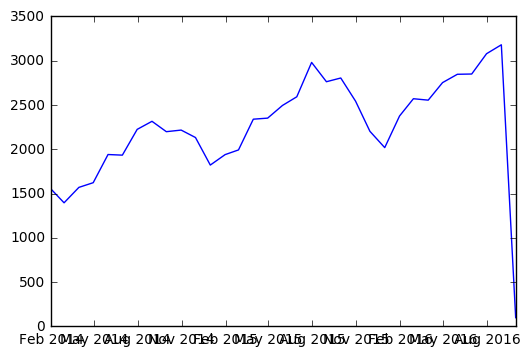

In [16]:
# reviews['rating_date'] = pd.to_datetime(reviews['rating_date'], format='%Y-%m-%dT%H:%M:%S')
# timeseries = reviews.set_index('rating_date')
timeseries = reviews.set_index('timestamp_rating')
ts = timeseries['2014-01-01':'2016-09-01'].ix[:,'rating'].resample('M').count()
%matplotlib inline
x = ts.index
y = ts.values
plt.plot(x,y)

# print(timeseries['2014-01-01':'2016-09-01'].ix[:,'rating'].resample('M').count())

In [17]:
reviewByHotels = reviews.groupby('item_id')

In [18]:
import pandas as pd
for hotel_url, group in reviewByHotels:
    subset = group.ix[:,['timestamp_rating', 'rating']]
    summary = subset.ix[:,'rating'].describe()
#     print(summary)
#     subset['rating_date'] = pd.to_datetime(subset['rating_date'], format='%Y-%m-%dT%H:%M:%S')
    subset.set_index('timestamp_rating',inplace=True)
    ## Do my own thing: input is subset of rating with timestamp index. output is bin
    ## count for last 2 years of rating on a weekly span.
    
    
    
    
    
#     print(subset.resample('AS').count()) # annual start
#     last2years = pd.date_range('2014-01-01','2016-09-01')
#     last2years = pd.period_range('2014','2016')
#     print(last2years)
#     weeklyCount = subset['2014-01-01':'2016-09-01'].resample('AS').count()
    print(subset['2014-01-01':'2016-09-01'].resample('AS').count())
#     print(weeklyCount)
#     print(subset["2014-01-01":"2016-09-01"])
        


                  rating
timestamp_rating        
2016-01-01            22
                  rating
timestamp_rating        
2014-01-01             1
2015-01-01             1
                  rating
timestamp_rating        
2014-01-01           195
2015-01-01           204
2016-01-01             6
                  rating
timestamp_rating        
2015-01-01             1
                  rating
timestamp_rating        
2014-01-01            40
2015-01-01            34
2016-01-01            38
                  rating
timestamp_rating        
2014-01-01           684
2015-01-01           868
2016-01-01           605
                  rating
timestamp_rating        
2014-01-01           151
2015-01-01           182
2016-01-01           143
                  rating
timestamp_rating        
2014-01-01           198
2015-01-01           309
2016-01-01           228
                  rating
timestamp_rating        
2014-01-01           670
2015-01-01           619
2016-01-01           518
